## Statistical Methods in Python For Rare Event Searches

*Summer Course at Canfranc Underground Laboratory (LSC) July 2019*

### Lecture I

## Introduction

*Author: Jose A. Hernando*, June 2019

*Instituto Galego de Altas Enerxías. Universidade de Santiago de Compostela, Spain.*

In [1]:
import time
print( ' Last Execution ', time.asctime())

 Last Execution  Thu Jul  4 17:49:38 2019


**About**

These lectures are about statistical method for rare event searches in Particle Physics using Python. They cover Hypothesis Testing and Confidence Intervals. They are based on the excellent lectures on statistics by Prosper [1], Cowan [2] and Cranmer[3] given at CERN Academic Training.

We will use the Python scientic toolkits, Matplotlib, Numpy, Scipy, that are distributed with Anaconda Python [9]. 

In [2]:
# general imports
%matplotlib inline
%reload_ext autoreload
%autoreload 2

# numpy and matplotlib
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats       as stats
import scipy.optimize     as optimize 

import htintro_examples  as htexam

plt.style.context('seaborn-colorblind');

## 1. Introduction

We are making an experiment to discover a new particle. 

We are expecting few events if the particle exits in Nature (it is usually the case at any discovery!). This is a **rare search**.

Rare events usually follow poissonian disbritubions. Unfortunately, as the statistics are nicely and friendly in the "Gaussian domain".

And second,

When we could clain an **observation** or a **discovery** of the new particle? And if not, what is the **limit** in a given observable (i.e. the half lifetime) we could impose?

In fact, *what does it mean discovery, observation, a limit, a confidence interval?*
And, *how do we compute them from data?*

These are the question we try to answer in these lectures.

We will discovery that we need to cover three issues:
- Hypothesis Testing
- Confidence Interval
- Regression 

They seem different but they are not!

We start for the a **simple hypothesis**, $H_1$ (i.e BSM) that confronts the current hypothesis, $H_0$, (called null, i.e SM). 

Soon we realize that in general the alternative hypothesis depends on a **strength parameter** $\mu$, that is, $H_1(\mu)$. For example the half-lifetime of $\beta\beta0\nu$ decay. This is called **composite hypothesis**.

And then we are back to estimate the region of $\mu$ "compatible" with data $x$, that is to define some **confidence intervals**, which in most cases implies to estimate the parameter, $\hat{\mu}$, that is **regression**.

The starting point is a bifurcation: either we follow a **Bayes** or a **Frequentist** path.

Bayesian compute *credible intervals* while Frequentist talk about *coverage intervals* (CI) and they do mean very different things! 

Be a Bayesian usually implies do **integration** (sometime complicated integrals!).

Be a frequentist implies usually either do regression (fits!) or do **simulations**. 
But thanks to the current computer power, we can play the **frequentist game**!

In this lectures we will use Python (in fact, scipy, numpy and mathplotlib) for our (mostly) frequentist journey!

But let's start with refreshing some basic ideas about probability density functions, likelihoods and posterior probabilities.

## 2. Probability and Bayes' theorem

Nature is probabilistic and our measurements are too. 

The starting point of probability are the **Kolmogorov axioms**:

* the probability for an event, $E$, is non negative $P(E)\ge 0$,
* the probability for the entire space of possibilities,$\Omega$, is one, $P(\Omega) = 1$,
* the probability for disjoint events, $E_1,\dots,E_n$, is additive, $P(E_1  \dots  \cup E_n) = \sum_{i=1,n} P(E_i)$.

From there we obtain the following corollaries:
* $P(A \cup B) = P(A) + P(B) - P(A \cap B) $
* $P(!E) = 1- P(E)$ 
where $!E$ is probability that $E$ does not happen.

### Bayes' theorem

The probability $P(A)$ that an event happens, for example that rolling the dice we get 3, is called **marginal probability**. The probability that an event $A$ happens if another one $B$ has happened is called **conditional probability**, $P(A|B)$. For example, the probability that rolling your dice is 3 if you know that the number obtained was odd, in that case $P(3|\mathrm{odd})=1/3$. The Bayes' theorem relates both probabilities. 

If $A,B$ are two events with marginal probabilities $P(A),\, P(B)$, the conditional probabilities $P(A|B), \, P(B|A)$ are:

$$
P(A|B) = \frac{P(B|A)\,P(A)}{P(B)}
$$


**Example:** consider the experiment of rolling two dices, $A$ is the case when the sum of both dices is 6, and $B$ when one of them is 4. Verify the Baye's theorem.

The probability to get six adding both dices is $P(A)= 5/36$, possible outcomes are $\{(1,5),(2,4),(3,3),(4,2),(5,1)\}$, the probability to get four when the addition is six is therefore $P(B|A)=2/5$. Now, the probability to get one dice with four is $P(B)=11/36$, and the probability that both add six if one is four is $2/11$, therefore:

$$
\frac{11}{36} \, \frac{2}{11} = \frac{2}{5} \, \frac{5}{36} = \frac{1}{18}
$$

what verifies the Bayes' theorem.

**Exercise:** The probability of an individual to have HIV+ is 1 in 10000. Consider a medical test of HIV. If the patient is HIV+, the test is positive in 99 % of the times, but if the person is HIV- person, the test can wrongly be positive in 2 % of the times. After a test, a patient is diagnosed with HIV+, what is the probability that he has HIV +? Should the doctor repeat the test?

**Exercise:** A neutrino experiment has a problem with the DAQ, and 5% of the runing time it does not observe interactions. The neutrinos are produced by a reactor nearby that operates 75% of the time. In this moment, the experiment does not observe neutrinos, what is the probability that the reactor is off?

## 3. Frequentist vs Bayesians

The is a great divide in statistics: frequentist vs Bayesians. 

**Frequentist are inductive**. *They compute the probability of an observation by repeating the same experiment many times*. They test is the data is compatible with the theory. 

They measure a **likelihood function**:
$$
\mathcal{L} (x | \mu)
$$

where $\mu$ is the theory and $x$ the data. 

**Bayesians are deductive**. *They compute the probability using the Bayes' theorem. 
They measure the credibility of a theory based on the data, but they need to assign first a prior probability based in a 'reasonable' initial guess*. 

They measure a **posterior probability**:
$$
p(\mu | x)
$$


A conversation of a bayesian and a frequentist about rolling a dice with 6 faces!

<img src="figs/bayes_cartoon.png" width="300">



Most of physicist we are bayesians, but we think of ourselves as frequentists. 

Consider the discovery of the Higgs. If you are frequentist you claim: "LHC data strongly disagrees with the hypothesis of the SM without the Higgs and agrees with a Higgs in the SM.", while a Bayesian claims: "We have discovered the Higgs!"



## 4. Probability density functions


In physics the variables that we measure are of probabilistic nature, therefore are **random variables** (rv). The probability distribution, $g(x)$ that follow a rv is called **probability density function**, pdf. If $x$ takes discrete values, the name is **probability mass function** (pmf). 

In most of the cases the pdfs depends on a parameter(s) $\mu$, indicated as $g(x | \mu)$.

From the probability axions we have: 

$$
\int_{-\infty}^{\infty} g(x) \mathrm{d}x = 1
$$

We give the cumutative density function (cdf), $F(x)$, as:

$$
F(x) = \int_{-\infty}^{x} g(x) \mathrm{d}x
$$

We call **marginal** pdf* when one or more rvs are integrated out, for example if we integrate $x_n$:
$$
g(x_1,\dots,x_{n-1}) = \int g({\bf x}) \mathrm{d}x_n
$$

We can "project" the pdf in one axis, that is get the marginal pdf for each variable $x_i$ individually:
$$
g(x_j) = \int g({\bf x}) \, \Pi_{i=1,n; i \neq j} \, \mathrm{d}x_i
$$


**Example:** Consider the case in which we try to observe a signal event in $n$ independent channels. In each one we expect $b_i$ background events and, if there is signal, $s_i$ events. What is the total PDF?



As the channels are $n$ independent, the pdf is the product of the pdf of each channel. In each channel we can observe $n_i$ events, the total observation is ${\bf n} = (n_1,\dots,n_n)$. The pdfs for the $b$, background only, and $b+s$, background and signal hypothesis are distributed with a Poisson:
$$
g({\bf n}|s,b) = \Pi_{i=1,n} \frac{(s_i+b_i)^{n_i}}{n_i!} e^{-(s_i+b_i)}, \;\;\;
g({\bf n}|b) = \Pi_{i=1,n} \frac{b_i^{n_i}}{n_i!} e^{-b_i}
$$

## 4. Likelihood and posterior  probability - An example

Let's consider the basic measurement case seen by a frequentist and by a bayesian.

We just measure a quantity $\mu$ using a set of data $x$. We know that $x$ are gaussian distributed with known sigma, $\sigma$. We want to estimate $\hat{\mu}$.

For example, we have a set of measurement from a gaussian distribution with mean zero and sigma one. How we obtaine $\hat{mu}$. 

Obvious, it is the average! And the uncertanty in the average is $\sigma/\sqrt{n}$, where $n$ is the number of events in our sample!

But let's see how a frequentist and a bayesian proceed in detail.

### Likelihood 
A frequentist evaluate the likelihood of its data.

The **probability density function**, *pdf*, $g(x | \mu)$is the probability to measure $x$, which depends via the parameter $\mu$.

A **likelihood** is the probability evaluted on a observation data, $x$, (on data!)

For n, ${\bf x}$, independent events that follow a pdf, $g(x | \mu)$, the likelihood is the product of the likelihood of each measurement $x_i$:

$$
\mathcal{L}({\bf x} | \mu) = \Pi_{i=1}^n g(x_i | \mu)
$$


The likelihood can be a very small number, for that reason, it is common to take the logarithm, and called **log likelihood**:

$$
\ln \mathcal{L}(x |\mu) = \sum_{i=1}^n \ln \left(g(x_i |\mu) \right)
$$



Given a dat $x$, and with $\mu$ inknown, the likelihood is a function that depends on the parameter $\mu$, $\mathcal{L}(\mu)$. In most cases a frequentist estimate the best-parameters, $\hat{\mu}$ as the parameters that maximizes the likelihood (this is the maximum likelihood estimation).

But for convenience, use instead:
$$
-2 \log \mathcal{L}(x |\mu)
$$

In the following example, you can generate a n-size sample with $x$ values generated random from a normal gaussian. The likelihood function is drawn as a function $\mu$. The best-estimate $\hat{\mu}$ is the value where the likelihood is maximum.


**Explore:** Generate $n$ samples of a normal. Compute the likelihood as funciton of the mean (fix sigma of the gaussian to 1).

mu mean : -0.20365453876507605 , mu std : 0.31622776601683794


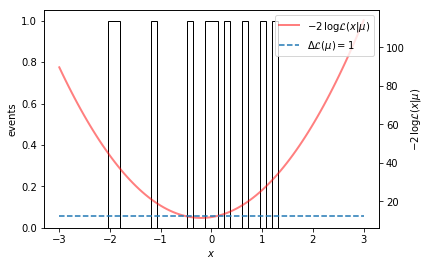

In [3]:
nsize = 10
xs = stats.norm(0., 1.).rvs(nsize)
htexam.normal_likelihood(xs);
#plt.yscale('log');

### Posterior probability in bayesian statistics

With bayesian statistic one can improve a prior "knowledge" using the data.

Suppose that we have an ensemble of possible hypotheses $\mu$, with a prior probability $\pi(\mu)$. Given some observation, $x$, Bayes' theorem allow us to compute the **posterior probability**, $\pi'(\mu)$. The probability of $\mu$ given the data $x$, $p(\mu|x)$, is: 

$$
p(\mu|x) = \frac{p(x|\mu) \, \pi(\mu)}{\int p(x|\mu) \pi(\mu) \, \mathrm{d}\mu}
$$


As the total probability for the ensemble of hypothesis $\mu$ should be one, we can compute the posterior, $\pi'(\mu)$

$$
\pi'(\mu) = \frac{p(\mu | x)}{\int p(\mu | x) \mathrm{d}\mu}
$$


**Exercise:** Show that the posterior of n $x$ normal distributed measurements, $p(x | \mu, \sigma)$, with a flat prior on $\mu$, and known $\sigma$, is a gaussian with mean $\mu = \bar{x}$, the average of the $n$ $x$ measurements, and the sigma $\sigma/\sqrt{n}$

**Example:** Consider the example above. An sample of $n$ measurements from a normal distribution. Obtain the posterior probability of the mean, if the sigma is know. 

posterior integral 1.000


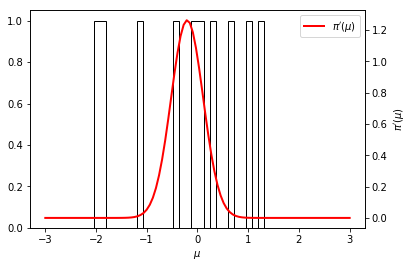

In [4]:
htexam.normal_posterior(xs);

mu mean : -0.19174859055133267 , mu std : 0.31622776601683794
posterior integral 1.000


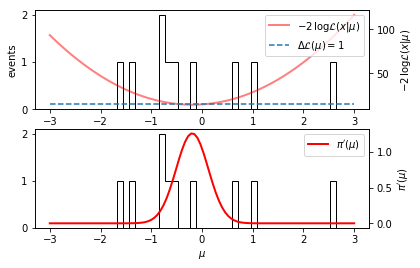

In [5]:
nsize = 10
xs    = stats.norm(0., 1.).rvs(nsize)
plt.subplot(2, 1, 1); htexam.normal_likelihood(xs)
plt.subplot(2, 1, 2); htexam.normal_posterior(xs);

**Exercise:** Show that the posterior of a normal prior, $\pi(\mu | \mu_0, \sigma_{\mu_0})$,
and a normal likelihood, $p(x |\mu, \sigma)$, for n-measurements, $x$, is a normal distribution with mean, $\mu'$, and sigma, $\sigma_{\mu'}$:

$$
\frac{1}{\sigma^2_{\mu'}} = \frac{n}{\sigma^2} + \frac{1}{\sigma^2_{\mu_0}}, 
\;\;\;
\mu' = \sigma^2_{\mu'} \left( \frac{\mu_0}{\sigma^2_{\mu_0}} + \frac{\sum_i x_i}{\sigma^2} \right)
$$

**Exercise:** There are several dices in a box, with 4, 6, 12 and 24 sides. We pick one randomly and we roll it four times, with outcomes, $1,4,5,2$, what is the posterior probability that the selected dice has 4, 6, 12 or 24 sides?, what is the posterior probability if we roll it twice again and wet get 6 and 1? 

In [6]:
measurements = [1, 4, 5, 2]
hpriors      = [0.25, 0.25, 0.25, 0.25]
for meas in measurements:
    hpriors = htexam.dice_posterior(meas, hpriors) 
    print('data :', meas, ' posteriors: ', hpriors)

data : 1  posteriors:  [0.46153846 0.30769231 0.15384615 0.07692308]
data : 4  posteriors:  [0.63157895 0.28070175 0.07017544 0.01754386]
data : 5  posteriors:  [0.         0.87671233 0.10958904 0.01369863]
data : 2  posteriors:  [0.         0.93772894 0.05860806 0.003663  ]


## 5. Expectation values

Given a $x$ rv that follows a pdf, $\, g(x)$, and a function $f(x)$ on $x$, we define the expected value of $g(x)$ as:

$$
E[g(x)] \equiv \int f(x) \, g(x) \, \mathrm{d}x
$$

The **mean**, or average value, is the expected value of $x$:

$$
E[x] = \mu \equiv  \int x \, g(x) \, \mathrm{d}x
$$

The **variance** is the expected value of $(x-\mu)^2$:

$$
V[x] = \sigma^2 = E[(x-\mu)^2]= E[x^2]-\mu^2 \equiv \int (x-\mu)^2 \, g(x) \, \mathrm{d}x
$$

We call **standard deviation** to:

$$
\sigma = \sqrt{V[x]}
$$

The standard deviation is related with the spread of the pdf, while the mean is related with the center of density of the pdf. 




The **expected value** is the $x$ value with the highest probability $g(x)$.

The **median**, is the $x_{med}$ value that divides the distribution in half, 

$$
\int_0^{x_{med}} g(x) \mathrm{d}x = 0.5
$$

For a symmetric pdf, the mean and median are the same.


If ${\bf x}$ is a vector, the pdf is a n-dimensional function. In that case, we define the covariance element between $i$ and $j$ elements as:

$$
\mathrm{cov}[x_i,x_j] = \int x_i \, x_j \, g({\bf x}) \; \Pi_{i=1,n} \mathrm{d}x_i
$$

If the variables $x_i, \, x_j$ variables are independent then the covariance is zero. But the contrary is not necessarily true.



## 6.  Common probability density functions 

The most commont distributions in HEP are:

* **Binomial**. A event can happen with probability $p$. The probability to get $n$ events if we try $N$ times is given by the binomial pdf.

$$
g(n|N,p) = \frac{N!}{n! (N-n)!} p^n (1-p)^{N-n}
$$

* **Poisson**. Related with the number of events if we expect $\nu$. The number of interactions in a crossing of the LHC beams is modeled with a poisson.

$$ 
g(n|\nu) = \frac{\nu^n}{n!} e^{-\nu}
$$ 

* **Uniform**. Equal probability to get $x$ in an interval $[a, b]$.

$$
g(x|a,b) = \frac{1}{(b-a)}
$$



* **Exponential**. An event can happen in $x$ with probability $1/\tau$. It describes the time of particles decays.

$$
g(x|\tau) = \frac{1}{\tau} e^{-x/\tau}
$$

* **Gaussian** (or normal). Associated with the distributions of measurements.

$$ 
g(x|\mu,\sigma) = \frac{1}{\sqrt{2\pi} \sigma} e^{-\frac{(x-\mu)^2}{2\sigma^2}}
$$ 

* **$\chi^2_n$** with $n$ degrees of freedom. Associated with goodness of fit.

$$
g(x|n) = \frac{1}{2^{n/2} \Gamma(n/2)} x^{n/2-1}e^{-x/2}
$$


* **Breit-Wigner**. Describes the distribution of masses in resonances. 

$$
g(x|\Gamma,x_0) = \frac{1}{\pi} \frac{\Gamma/2}{\Gamma^2/4 + (x-x_0)^2} 
$$

* **Beta**. Associated with the measurement of probabilities. Used in Bayesian statistics.

$$
g(x | \alpha,\beta) = \frac{\Gamma(\alpha+\beta)}{\Gamma(\alpha)\Gamma(\beta)} x^{\alpha-1} (1-x)^{\beta-1}
$$

where $x, \alpha, \beta$ are positive.
* **Gamma**. Associated with bayesian statistics with poisson distributions. 

$$
g(x | \alpha,\beta) = \frac{\beta^\alpha}{\Gamma(\alpha)} x^{\alpha-1} e^{-x \beta}
$$

where $x, \alpha, \beta$ are positive.




Some of the pdfs are nicely related:

In the case that an event is rare but we do a large number of trials, their distribution follow a binomial with $p \to  0$, $N \to \infty$, if $ N \, p = \nu$ is constant, (this happens in nuclei decays), the binomial transform into Poisson with mean $\nu$. 

When $\nu$ is "large", 12 is enough, the Poisson transforms into Gaussian with $\mu=\nu$.

When we take n values of $x$, gaussian distributed, with mean $\mu$ and sigma $\sigma$, and compute $\chi^2 = \sum_{i=1,n} \frac{(x_i -\mu)^2}{\sigma^2}$, it follows a chi-squared distribution with $n$ degrees of freedom.



**Exercise:** Compare a poisson distribution, with $\nu=p \, N$ with a binomial when $N$ is large and $p$ is small.

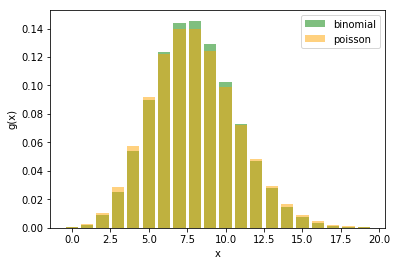

In [7]:
N, p = 100, 0.08; ns = np.arange(20)
plt.bar(ns, stats.binom.pmf(ns, N, p) , color='green', alpha=0.5, label='binomial')
plt.bar(ns, stats.poisson.pmf(ns, N*p), color='orange', alpha=0.5, label='poisson')
plt.xlabel('x'); plt.ylabel('g(x)'); plt.legend();

**Exercise:** Check that from a "large" $\nu$ the poisson distribution is equivalent to a gaussian distribution.

**Exercise:** Generate $m$ datasets, each one with $n$ data, $x_i$ distributed random in $[0, 1]$ interval, sum the $n$ numbers, $\sum_i^n x_i$ and obtain the distribution of the $m$ samples.

**Exercise:** Generate $m$ datasets, each with $n$ data, $x_i$, normal distributed, compute its distance squared $\chi^2 = \sum_{i=1}^n x^2_i$, what is the distribution of $\chi^2$?

**Exercise:** Generate $n$ $x_i$-values, each one gaussian distributed with mean $\mu_i$ and sigma $\sigma_i$, show that the sum $\sum_i x_i$ is gaussian distributed with mean, $\mu = \sum_i \mu_i$, and sigma $\sigma^2 = \sum_i \sigma^2_i$.


**Exercise:** Get the poisson distribution from a Gamma distribution.

**Exercise:** Get an exponential distribution from a Gamma distribution.

**Exercise:** Get the $\chi^2$ distribution from a Gamma distribution.

**Exercise:** Study the Beta distribution for different parameters of $\alpha, \beta$ (start $\alpha=\beta=1$).

***

## Bibliography

[1] "Practical Statistic for LHC physicist," H. B. Prosper, CERN Academic Training Lectures (2015). https://indico.cern.ch/event/358542/ https://arxiv.org/pdf/1504.00945.pdf

[2] "Statistic for HEP," G. Cowan. CERN Academic Training Lectures (2012). http://indico.cern.ch/event/173726/

[3] "Statistics for Particle Physics," K. Cranmer, CERN Academic Training Lectures (2009). 
https://indico.cern.ch/event/48425/

[4] "Unified approach to the classical statistical analysis of small signals, "G. J. Feldman and R. D. Cousins, Phys. Rev. D57 (1998) 3873. http://journals.aps.org/prd/abstract/10.1103/PhysRevD.57.3873

[5] “Asymptotic formulae for likelihood-based tests of new physics,” Glen Cowan, Kyle Cranmer, Eilam Gross, Ofer Vitells. Eur. Phys. J. C71 1554 (2011). https://arxiv.org/abs/1007.1727

[6] "Incorporating systematic uncertainties into an upper limit," R.D. Cousins and V.L. Highland. Nucl. Instrum. Meth. A320, 331 (1992). http://www.sciencedirect.com/science/article/pii/0168900292907945

[7] "Confidence Level Computation for Combining Searches with Small Statistics," T. Junk, Nucl. Instrum. Meth. A434, 435 (1999). https://arxiv.org/abs/hep-ex/9902006  

[8] "How good are your fits? Unbinned multivariate goodness-of-fit tests in high energy physics," M. Willians, https://arxiv.org/abs/1006.3019

[9] ROOT https://root.cern.ch, TMVA http://tmva.sourceforge.net, RooFit https://root.cern.ch/roofit

[10] Anaconda https://anaconda.org, SciPy https://www.scipy.org, NumPy http://www.numpy.org, Scikit-learn http://scikit-learn.org/stable/, Matplotlib http://matplotlib.org